In [1]:
import laspy

In [2]:
import numpy as np

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
import matplotlib.pyplot as plt

In [5]:
with laspy.open("F:/Data/Lidar/dtvan/dtvan_aoi_clip.las") as lidar:
    lasfile = lidar.read()

In [7]:
lasfile.header.point_count

864440

In [19]:
lasfile.header.z_max

106.62

In [20]:
lasfile.header.z_max - lasfile.header.z_min

115.88000000000001

In [25]:
sorted(lasfile.intensity)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14

In [51]:
max(lasfile.intensity)

4059

In [53]:
[las for las in lasfile.intensity if las < 4059]

[189,
 211,
 189,
 212,
 222,
 217,
 204,
 218,
 203,
 169,
 181,
 191,
 200,
 200,
 179,
 201,
 225,
 206,
 206,
 209,
 199,
 201,
 216,
 199,
 201,
 207,
 209,
 200,
 199,
 203,
 229,
 191,
 204,
 233,
 230,
 216,
 205,
 207,
 212,
 195,
 221,
 191,
 200,
 228,
 230,
 230,
 215,
 213,
 227,
 216,
 183,
 206,
 205,
 203,
 210,
 231,
 215,
 215,
 233,
 215,
 195,
 199,
 206,
 223,
 217,
 197,
 211,
 205,
 209,
 197,
 200,
 211,
 205,
 213,
 205,
 204,
 217,
 211,
 218,
 213,
 234,
 209,
 219,
 219,
 201,
 203,
 209,
 219,
 217,
 207,
 187,
 189,
 189,
 217,
 201,
 197,
 191,
 209,
 222,
 207,
 212,
 212,
 230,
 210,
 207,
 201,
 213,
 197,
 198,
 197,
 252,
 234,
 219,
 207,
 228,
 211,
 207,
 198,
 216,
 215,
 223,
 204,
 206,
 215,
 206,
 249,
 210,
 216,
 248,
 219,
 229,
 201,
 251,
 236,
 197,
 225,
 206,
 209,
 218,
 264,
 221,
 249,
 218,
 204,
 253,
 241,
 222,
 219,
 246,
 223,
 231,
 255,
 233,
 204,
 235,
 236,
 233,
 223,
 225,
 247,
 228,
 213,
 247,
 235,
 241,
 229,
 214

(array([201387., 344400., 160350.,  94808.,  44907.,  10222.,   2383.,
           945.,    662.,    529.]),
 array([  1. ,  50.8, 100.6, 150.4, 200.2, 250. , 299.8, 349.6, 399.4,
        449.2, 499. ]),
 <BarContainer object of 10 artists>)

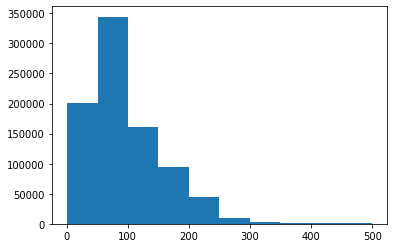

In [59]:
plt.hist([las for las in lasfile.intensity if las < 500],10)

In [60]:
uc = lasfile[lasfile.classification == 1]

In [61]:
uc.header.point_count

789692

In [62]:
gnd = lasfile[lasfile.classification == 2]

In [63]:
gnd.header.point_count

74748

In [64]:
ucarray = np.vstack((uc.x,uc.y,uc.z,uc.intensity)).T

In [65]:
clusters = DBSCAN(eps=2,min_samples=10,leaf_size=25).fit(ucarray)
print("Number of clusters:" + str(len(np.unique(clusters.labels_))))
print("Points clustered: " + str(len([i for i in clusters.labels_ if i != -1])))

Number of clusters:3478
Points clustered: 184313


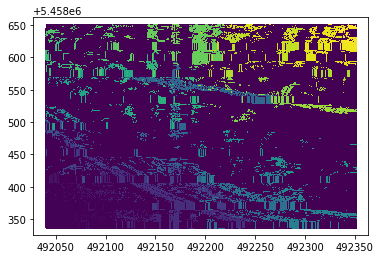

In [68]:
plt.scatter(uc.x,uc.y, c=clusters.labels_.astype(float),marker=",")